In [35]:
## IMPORTATION OF LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from xgboost import XGBRegressor

In [36]:
## EXPLORATORY DATA ANALYSIS
df= pd.read_csv('diamond_new.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,NaN,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,NaN,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
4,0.31,Good,J,NaN,63.3,58.0,335.0,4.34,4.35,2.75


In [73]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'G', 'D', 'F'], dtype=object)

In [74]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [75]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VVS2', 'VVS1', 'VS2', 'I1', 'IF'],
      dtype=object)

In [37]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [38]:
df.shape

(53968, 10)

In [39]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        179
table        126
price      11153
x            552
y            548
z            372
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53968 entries, 0 to 53967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53968 non-null  float64
 1   cut      53968 non-null  object 
 2   color    48571 non-null  object 
 3   clarity  48568 non-null  object 
 4   depth    48573 non-null  float64
 5   table    48569 non-null  float64
 6   price    48571 non-null  float64
 7   x        48573 non-null  float64
 8   y        48571 non-null  float64
 9   z        48569 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [41]:
df.isnull().sum()

carat         0
cut           0
color      5397
clarity    5400
depth      5395
table      5399
price      5397
x          5395
y          5397
z          5399
dtype: int64

In [42]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.029729,0.179462,0.921672,0.974795,0.949543,0.951274
depth,0.029729,1.000000,-0.292053,-0.008933,-0.026063,-0.027455,0.096957
table,0.179462,-0.292053,1.000000,0.127462,0.194012,0.179057,0.146625
price,0.921672,-0.008933,0.127462,1.000000,0.884928,0.862367,0.859223
x,0.974795,-0.026063,0.194012,0.884928,1.000000,0.969337,0.967284
y,0.949543,-0.027455,0.179057,0.862367,0.969337,1.000000,0.944526
z,0.951274,0.096957,0.146625,0.859223,0.967284,0.944526,1.000000


In [43]:
df.describe()

,carat,depth,table,price,x,y,z
count,53968.000000,48573.000000,48569.000000,48571.000000,48573.000000,48571.000000,48569.000000
mean,0.797690,61.752579,57.457444,3930.461386,5.729580,5.734506,3.537897
std,0.474017,1.430861,2.238826,3985.502319,1.122602,1.145479,0.706189
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


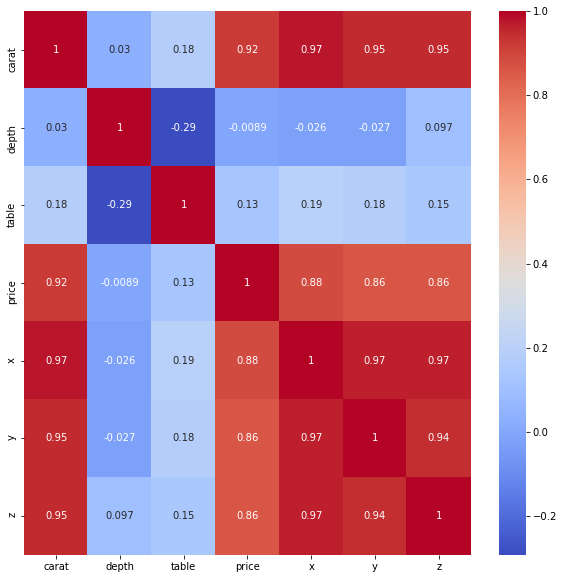

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

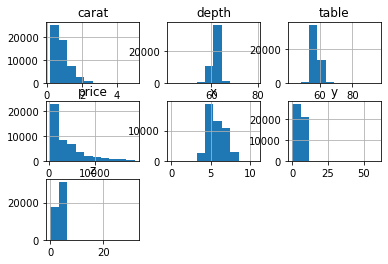

In [45]:
df.hist()

In [46]:
## FILLING FOR NULL VALUES
df['price'] = df['price'].fillna(value=df['price'].mean())
df['x'] = df['x'].fillna(value=df['x'].mean())
df['y'] = df['y'].fillna(value=df['y'].mean())
df['z'] = df['z'].fillna(value=df['z'].mean())
df['table'] = df['table'].fillna(value=df['table'].mean())
df['depth'] = df['depth'].fillna(value=df['depth'].mean())
df['clarity'] = df['clarity'].fillna(method='pad')
df['color'] = df['color'].fillna(method='pad')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

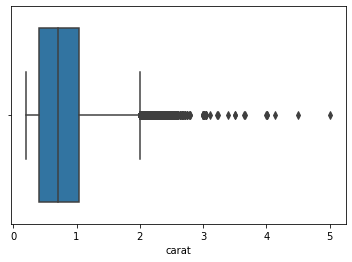

In [47]:
## CHECKING FOR OUTLIERS
sns.boxplot(df['carat'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

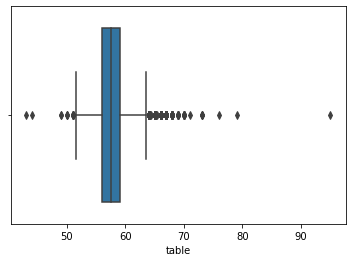

In [48]:
sns.boxplot(df['table'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

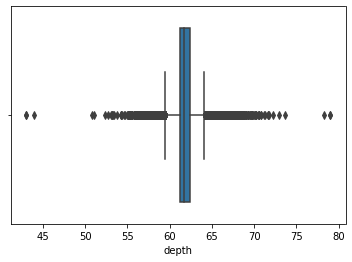

In [49]:
sns.boxplot(df['depth'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

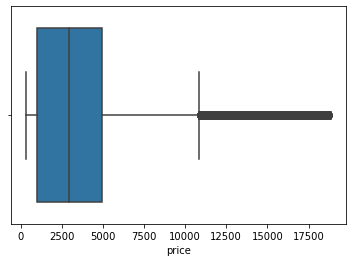

In [50]:
sns.boxplot(df['price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

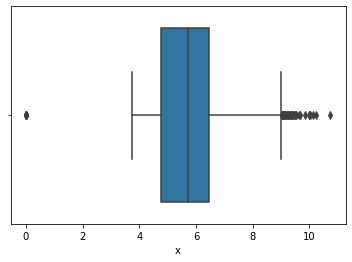

In [51]:
sns.boxplot(df['x'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

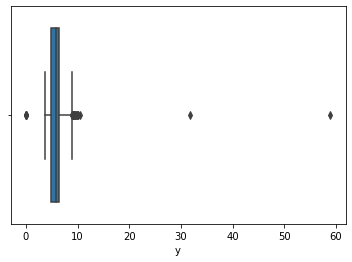

In [52]:
sns.boxplot(df['y'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z'>

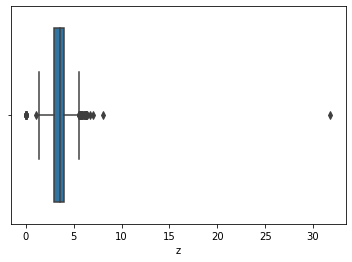

In [53]:
sns.boxplot(df['z'])

In [54]:
## REMOVAL OF OUTLIERS
zscores = np.abs(zscore(df[['carat','depth','table','price','x','y','z']]))
filtered_entries = (zscores <2.5).all(axis=1)
numerical_df = df[filtered_entries]

In [55]:
print(df.shape)
print(numerical_df.shape)

(53968, 10)
(48667, 10)


In [56]:
numerical_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [57]:
numerical_df.drop('cut', axis=1, inplace=True)
numerical_df.drop('color', axis=1, inplace=True)
numerical_df.drop('clarity', axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
numerical_df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [59]:
## NORMALIZATION OF DATASET
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numerical_df),columns= numerical_df.columns)

In [60]:
scaler2 = StandardScaler()
normalized_df2 = pd.DataFrame(scaler2.fit_transform(numerical_df),columns= numerical_df.columns)

In [61]:
features_df = normalized_df.drop(columns='price')
target_df = normalized_df['price']

In [62]:
features_df2 = normalized_df.drop(columns='price')
target_df2 = normalized_df['price']

In [27]:
features_df.head()

,carat,depth,table,x,y,z
0,0.016854,0.462687,0.254902,0.050000,0.453533,0.123333
1,0.005618,0.208955,0.843137,0.036364,0.035320,0.083333
2,0.050562,0.597015,0.549020,0.106818,0.453533,0.190000
3,0.061798,0.731343,0.549020,0.138636,0.147903,0.230000
4,0.022472,0.500385,0.450980,0.047727,0.061810,0.140000


In [63]:
features_df2.head()

,carat,depth,table,x,y,z
0,0.016854,0.462687,0.254902,0.050000,0.453533,0.123333
1,0.005618,0.208955,0.843137,0.036364,0.035320,0.083333
2,0.050562,0.597015,0.549020,0.106818,0.453533,0.190000
3,0.061798,0.731343,0.549020,0.138636,0.147903,0.230000
4,0.022472,0.500385,0.450980,0.047727,0.061810,0.140000


In [64]:
## SPLITTING OF DATASET INTO TRAIN AND TEST SETS
x_train, x_test, y_train, y_test = train_test_split(features_df,target_df, test_size=0.3, random_state=42)

In [66]:
x1_train, x1_test, y1_train, y1_test = train_test_split(features_df2,target_df2, test_size=0.3, random_state=42)

In [67]:
## MODELLING USING LINEAR REGRESSION MODEL
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) 
predicted_val = linear_model.predict(x_test)
print('R^2 value: ', round(linear_model.score(x_test,y_test),3))
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))

R^2 value:  0.758
RMSE Value:  0.105


In [70]:
linear_model = LinearRegression()
linear_model.fit(x1_train, y_train) 
predicted_val1 = linear_model.predict(x1_test)
print('R^2 value: ', round(linear_model.score(x1_test,y1_test),3))
RMSE = np.sqrt(mean_squared_error(y1_test, predicted_val1))
print('RMSE Value: ',round(RMSE,3))

R^2 value:  0.758
RMSE Value:  0.105


In [30]:
## MODELLING USING RANDOM FOREST REGRESSION
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train) 
predicted_val = random_forest_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))
print('R^2 value: ', random_forest_model.score(x_test,y_test))

RMSE Value:  0.106
R^2 value:  0.7539911514933655


In [31]:
## MODELLING USING SUPPORT VECTOR REGRESSION
SVR_model = svm.SVR()
SVR_model.fit(x_train, y_train) 
predicted_val = SVR_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))
print('R^2 value: ', SVR_model.score(x_test,y_test))

RMSE Value:  0.111
R^2 value:  0.7335188469854983


In [32]:
## MODELLING USING LINEAR SUPPORT VECTOR REGRESSION
model = svm.LinearSVR()
model.fit(x_train, y_train) 
predicted_val = model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))
print('R^2 value: ', round(model.score(x_test,y_test),3))

RMSE Value:  0.108
R^2 value:  0.747


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [33]:
##MODELLING USING XGBOOST REGRESSION MODEL
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train) 
predicted_val = xgboost_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))
print('R^2 value: ', round(xgboost_model.score(x_test,y_test),3))

RMSE Value:  0.104
R^2 value:  0.764
